In [35]:
# Importowanie niezbędnych bibliotek
%matplotlib inline

import matplotlib.pyplot as plt  # Importowanie biblioteki do tworzenia wykresów
import matplotlib.image as mpimg  # Importowanie biblioteki do obsługi obrazów
import seaborn as sns  # Importowanie biblioteki do tworzenia wykresów statystycznych
import numpy as np  # Importowanie biblioteki do obliczeń numerycznych
import pandas as pd  # Importowanie biblioteki do manipulacji danymi
import os  # Importowanie biblioteki do operacji na plikach i systemie operacyjnym
from PIL import Image, ImageEnhance  # Importowanie modułu z biblioteki PIL (Python Imaging Library) do pracy z obrazami

 



In [2]:
import numpy as np 
import pandas as pd 

In [36]:
from PIL import Image, ImageEnhance  # Importowanie modułu Image z biblioteki PIL do obsługi obrazów

# Funkcja load_images, która wczytuje obrazy z określonej ścieżki
def load_images(path):
    images = []  # Inicjalizacja pustej listy, do której będą dodawane obrazy
    for i in os.listdir(path):  # Iteracja przez pliki w podanej ścieżce
        img_path = os.path.join(path, i)  # Tworzenie pełnej ścieżki do obrazu
        images.append(Image.open(img_path))  # Wczytanie obrazu i dodanie go do listy images
    return images  


In [37]:
# Wczytywanie danych z pliku CSV
english_dataset = np.array(pd.read_csv('C:/Users/sajmo/Desktop/WDUM/projekt/dane/A_Z Handwritten Data.csv'))

# Tworzenie DataFrame zawierającego litery alfabetu angielskiego
english_alphabet = pd.DataFrame(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
                                 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
                                 'u', 'v', 'w', 'x', 'y', 'z'], [i for i in range(1, 27)])

# Kod wczytuje dane z pliku CSV do tablicy NumPy, a następnie tworzy DataFrame z literami alfabetu.


In [38]:
# Rozdzielenie danych na cechy (X) i etykiety (y)
X, y = english_dataset[:, 1:], english_dataset[:, 0]

In [39]:
# Importowanie funkcji do podziału danych na zbiór treningowy i testowy
from sklearn.model_selection import train_test_split

# Podział danych na zbiór treningowy (80%) i testowy (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Wyświetlenie kształtu (liczby wierszy i kolumn)
X.shape, y.shape

((372450, 784), (372450,))

In [40]:
import matplotlib.pyplot as plt  # Importowanie biblioteki do tworzenia wykresów

# Do wyświetlanie obrazów liter wraz z ich etykietami
def plot_letters(images, labels, width=14, height=14):
    # Określenie liczby wierszy (rows) i kolumn (cols) w siatce wykresu
    rows, cols = 4, 6
    # Tworzenie figury o określonym rozmiarze
    fig = plt.figure(figsize=(14, 14))
    sub_plot_i = 1  

    # Wyświetlanie 20 obrazów i przypisywanie tytułów literom z english_alphabet
    for i in range(0, 20):
        fig.add_subplot(rows, cols, sub_plot_i)
        sub_plot_i += 1  # Zwiększenie numeru podwykresu
        image = images[i].reshape(width, height)  # Przekształcenie obrazu do odpowiedniego kształtu
        plt.imshow(image, cmap='gray')  
        label = labels[i].astype(int) + 1  
        plt.title(english_alphabet.loc[label][0])  

    fig.tight_layout()  # Dostosowanie układu wykresów
    plt.show()  

# Ta funkcja służy do wyświetlania obrazów liter w układzie siatki 4x6 wraz z odpowiadającymi im etykietami.


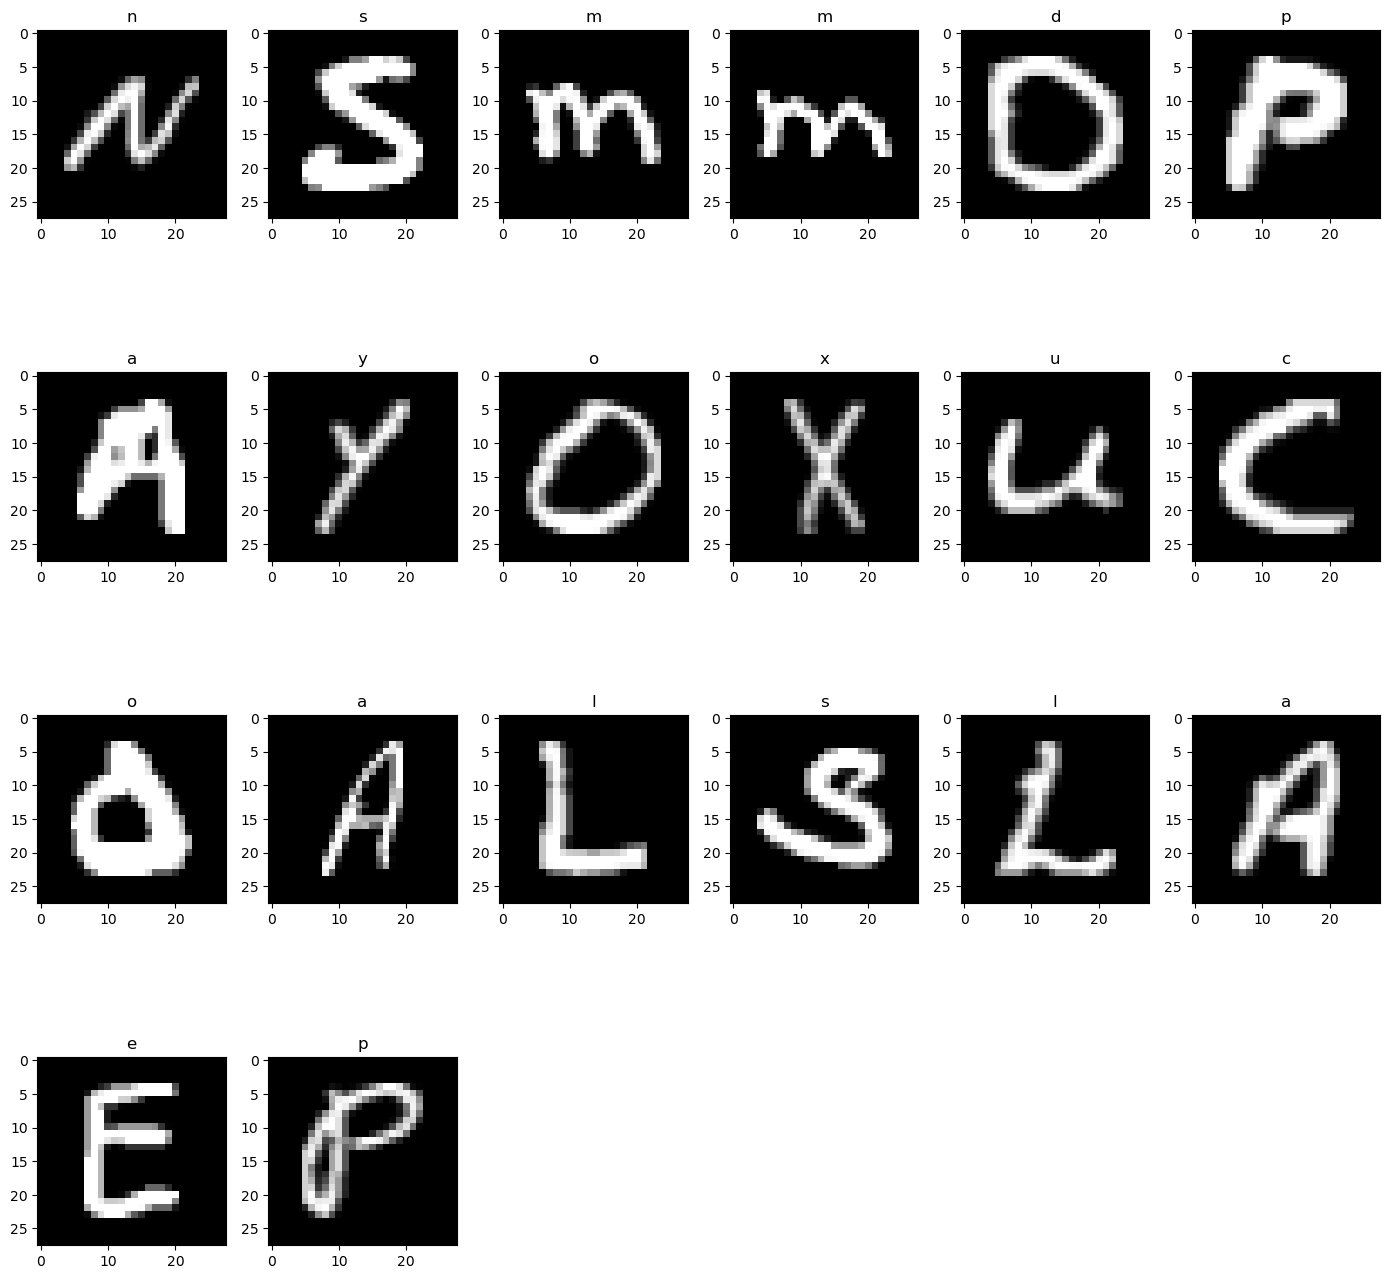

In [41]:
#wyświetlanie
plot_letters(X_train, y_train, 28, 28)

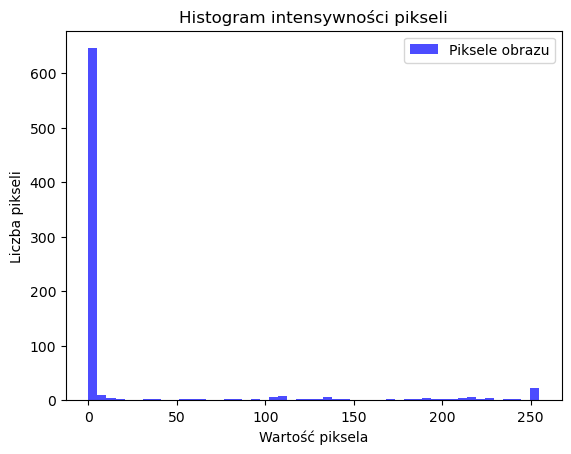

In [42]:
# Histogram intensywności pikseli dla jednego obrazu
plt.hist(X_train[0], bins=50, color='blue', alpha=0.7, label='Piksele obrazu')  # Tworzenie histogramu
plt.title('Histogram intensywności pikseli')  
plt.xlabel('Wartość piksela')  
plt.ylabel('Liczba pikseli')  
plt.legend()  
plt.show()  


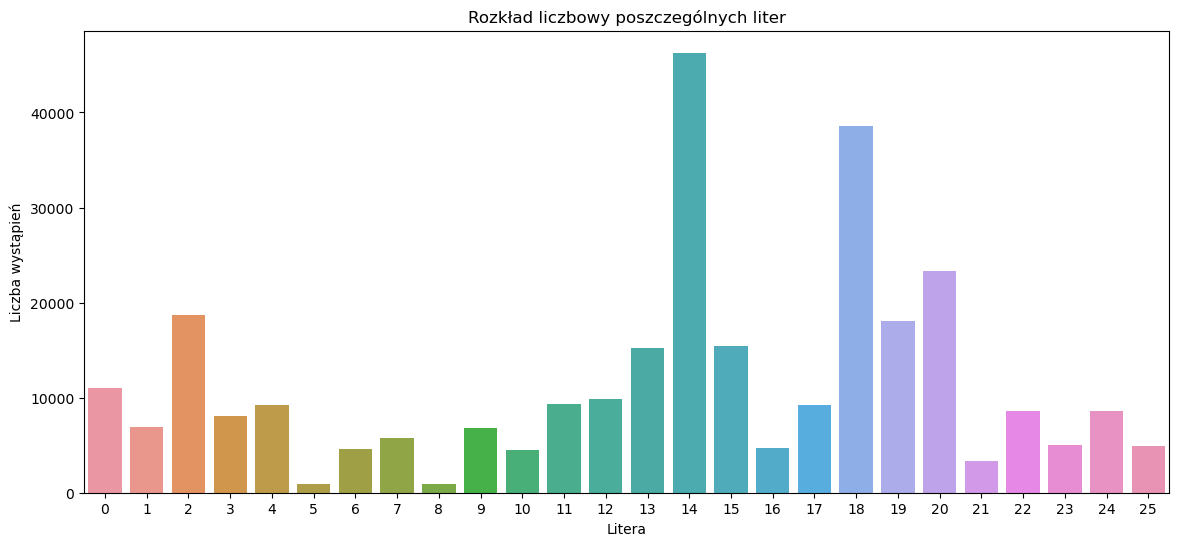

In [43]:
# Stworzenie rozkładu liczbowego dla poszczególnych liter
letter_distribution = pd.Series(y_train).value_counts().sort_index()

# Wykres słupkowy rozkładu liczbowego
plt.figure(figsize=(14, 6))
sns.barplot(x=letter_distribution.index, y=letter_distribution.values)
plt.title('Rozkład liczbowy poszczególnych liter')
plt.xlabel('Litera')
plt.ylabel('Liczba wystąpień')
plt.show()

# Przygotowanie danych do trenowania modeli
from sklearn.preprocessing import StandardScaler

# Standaryzacja danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)  





c:\Users\sajmo\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\sajmo\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


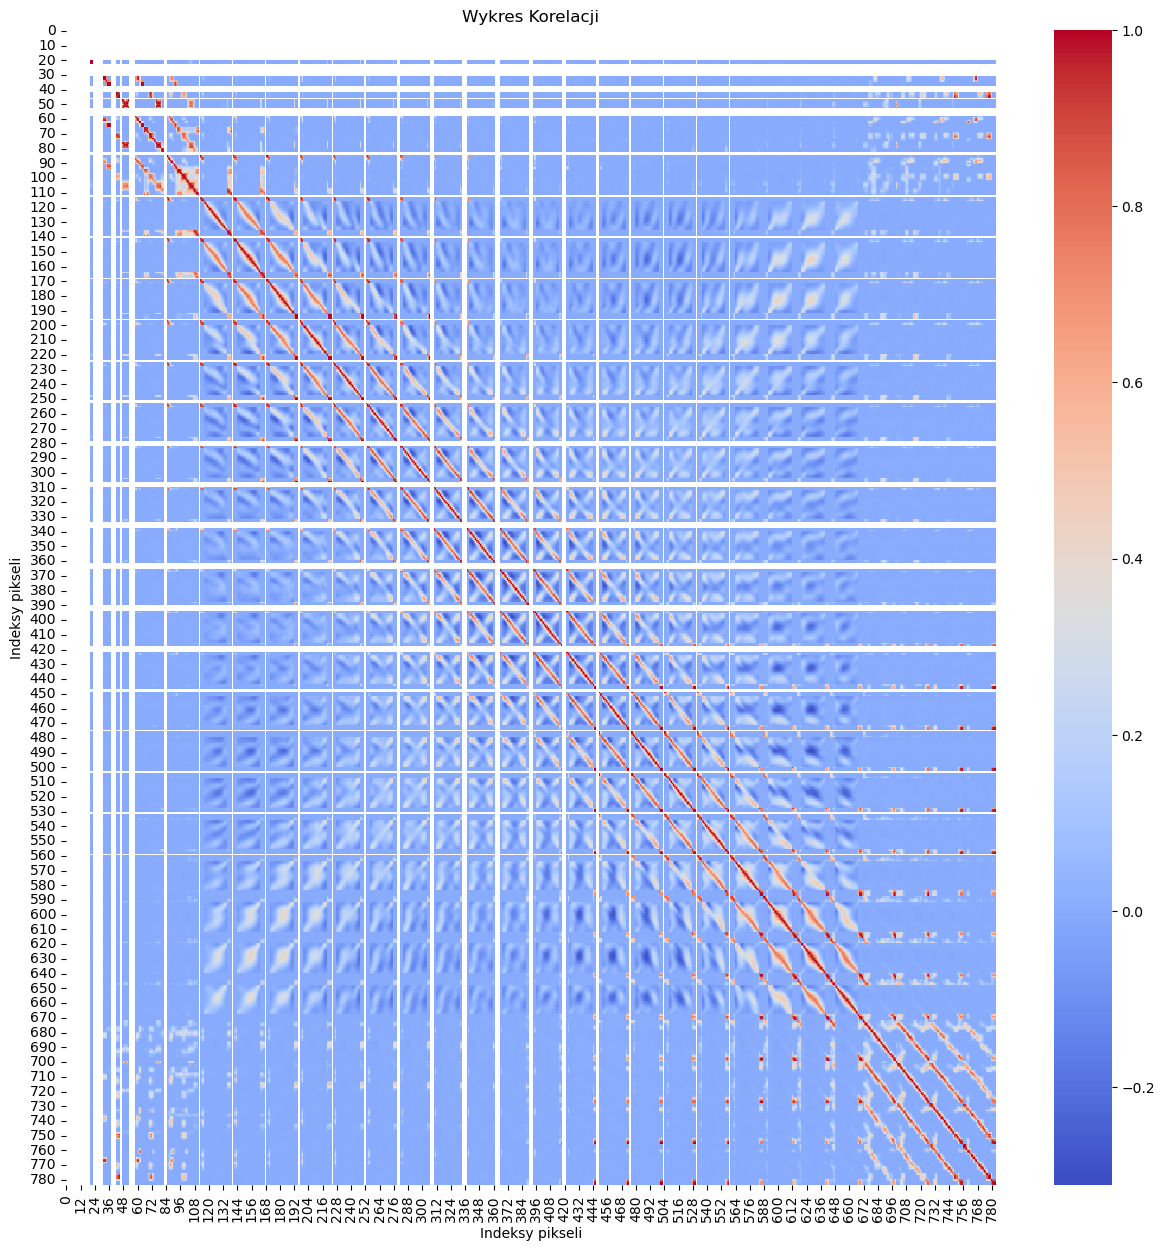

In [44]:
import seaborn as sns  
import matplotlib.pyplot as plt  

# Obliczenie macierzy korelacji dla danych 
correlation_matrix = np.corrcoef(X_train_scaled.T)

# Utworzenie wykresu heatmapy korelacji
plt.figure(figsize=(15, 15))  # Ustalenie rozmiaru wykresu
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')  # Wygenerowanie heatmapy
plt.title('Wykres Korelacji')  
plt.xlabel('Indeksy pikseli') 
plt.ylabel('Indeksy pikseli') 
plt.show() 


In [27]:
#Wartości te wskazują na stopień korelacji między danymi pikselami.
#Na wykresie macierzy korelacji, jasne obszary lub wzory wskazują na piksele, które są silnie skorelowane ze sobą.
#Wartości bliskie 1 oznaczają silną dodatnią korelację (gdy jedna wartość rośnie, druga również rośnie).
#Wartości bliskie -1 oznaczają silną ujemną korelację (gdy jedna wartość rośnie, druga maleje).
#Wartości bliskie 0 oznaczają brak korelacji.

In [45]:
# Importowanie odpowiednich klas z biblioteki scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Trenowanie modelu Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100) # Inicjalizacja modelu Random Forest z 100 drzewami
rf_classifier.fit(X_train_scaled, y_train)  # Trenowanie modelu na danych treningowych

# Przewidywanie na zbiorze testowym
y_pred_rf = rf_classifier.predict(X_test_scaled)  # Przewidywanie dla zbioru testowego

# Ocena modelu
print("Raport klasyfikacji dla Random Forest:\n", classification_report(y_test, y_pred_rf))  # Wydruk raportu klasyfikacji
print("Dokładność Random Forest:", accuracy_score(y_test, y_pred_rf))  # Wydruk dokładności modelu
print("Macierz błędów:\n", confusion_matrix(y_test, y_pred_rf))  # Wydruk macierzy błędów dla modelu


Raport klasyfikacji dla Random Forest:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2880
           1       0.99      0.97      0.98      1748
           2       0.99      1.00      0.99      4682
           3       0.98      0.96      0.97      2026
           4       0.99      0.98      0.99      2237
           5       0.99      0.94      0.96       217
           6       0.99      0.97      0.98      1140
           7       0.98      0.98      0.98      1471
           8       1.00      0.95      0.97       217
           9       0.99      0.98      0.98      1732
          10       0.98      0.95      0.97      1101
          11       0.99      1.00      0.99      2242
          12       0.99      0.97      0.98      2437
          13       0.98      0.99      0.99      3779
          14       0.99      1.00      0.99     11539
          15       0.99      0.99      0.99      3899
          16       0.99      0.94      0.

In [46]:
from sklearn.neural_network import MLPClassifier

# Trenowanie modelu MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500) 
# Inicjalizacja modelu MLP z jedną warstwą ukrytą zawierającą 100 neuronów.
mlp_classifier.fit(X_train_scaled, y_train)  # Trenowanie modelu na danych treningowych po przeskalowaniu.

# Przewidywanie na zbiorze testowym
y_pred_mlp = mlp_classifier.predict(X_test_scaled)  

# Ocena modelu
print("Raport klasyfikacji dla MLP:\n", classification_report(y_test, y_pred_mlp))  
print("Dokładność MLP:", accuracy_score(y_test, y_pred_mlp))  
print("Macierz błędów:\n", confusion_matrix(y_test, y_pred_mlp))  


Raport klasyfikacji dla MLP:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2880
           1       0.98      0.97      0.98      1748
           2       0.99      0.99      0.99      4682
           3       0.97      0.96      0.96      2026
           4       0.98      0.99      0.99      2237
           5       0.94      0.94      0.94       217
           6       0.97      0.98      0.97      1140
           7       0.97      0.98      0.98      1471
           8       0.97      0.94      0.95       217
           9       0.98      0.95      0.97      1732
          10       0.97      0.95      0.96      1101
          11       0.99      0.99      0.99      2242
          12       0.99      0.97      0.98      2437
          13       0.98      0.99      0.98      3779
          14       0.99      1.00      0.99     11539
          15       0.98      0.99      0.99      3899
          16       0.99      0.97      0.98      11

Dokładność Random Forest: 0.9881192106322997
Macierz błędów Random Forest:
 [[ 2863     0     0     1     1     0     0     0     0     0     1     1
      4     6     0     2     0     0     0     1     0     0     0     0
      0     0]
 [    8  1688     1    12     1     0     1     0     0     0     0     0
      0     1    13     1     0     9    12     0     0     0     0     0
      0     1]
 [    0     0  4668     0     0     0     0     0     0     0     0     4
      0     0     4     0     0     2     0     0     2     0     2     0
      0     0]
 [    3     2     0  1945     0     0     0     0     0     0     0     0
      1     0    64     1     1     0     6     0     3     0     0     0
      0     0]
 [    2     4    13     0  2194     0     7     0     0     1     2     4
      0     0     2     1     0     3     4     0     0     0     0     0
      0     0]
 [    0     0     0     0     3   203     0     0     0     0     0     0
      0     0     0    10     0    

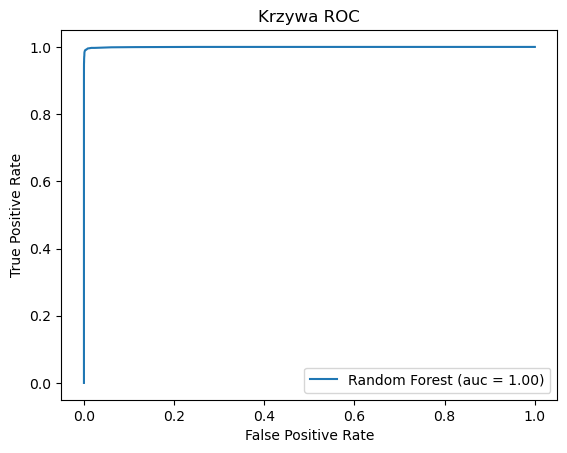

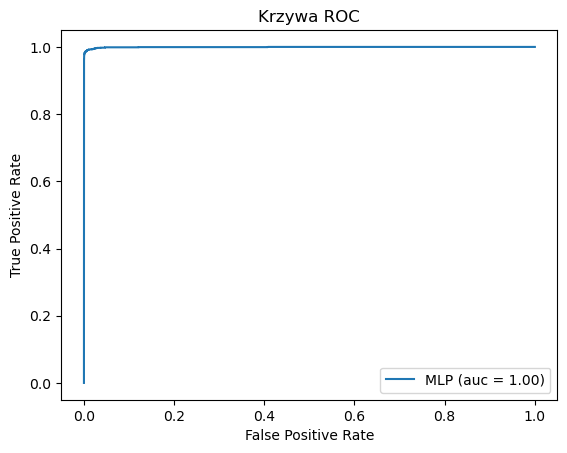

In [47]:
# Importowanie niezbędnych modułów
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Ocena dla modelu Random Forest
y_pred_rf = rf_classifier.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Dokładność Random Forest:", accuracy_rf)
print("Macierz błędów Random Forest:\n", confusion_matrix(y_test, y_pred_rf))
print("Raport klasyfikacji Random Forest:\n", classification_report(y_test, y_pred_rf))

# Ocena dla modelu MLP
y_pred_mlp = mlp_classifier.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Dokładność MLP:", accuracy_mlp)
print("Macierz błędów MLP:\n", confusion_matrix(y_test, y_pred_mlp))
print("Raport klasyfikacji MLP:\n", classification_report(y_test, y_pred_mlp))

# Funkcja do rysowania krzywej ROC
def plot_roc_curve(model, X_test_scaled, y_test, model_name):
    # Przewidywanie prawdopodobieństwa przynależności do klasy pozytywnej
    y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
    
    # Obliczanie punktów na krzywej ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
    
    # Obliczanie obszaru pod krzywą ROC (AUC)
    auc_score = auc(fpr, tpr)

    # Rysowanie krzywej ROC
    plt.plot(fpr, tpr, label=f"{model_name} (auc = {auc_score:.2f})")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Krzywa ROC')
    plt.legend(loc=4)
    plt.show()

# Rysowanie krzywych ROC dla obu modeli
plot_roc_curve(rf_classifier, X_test_scaled, y_test, "Random Forest")
plot_roc_curve(mlp_classifier, X_test_scaled, y_test, "MLP")



In [77]:
def predict_letters(images, width=28, height=28, alphabet=None, model=None):
    rows, cols = 1, len(images)
    fig = plt.figure(figsize=(width, height))
    sub_plot_i = 1

    # Wyświetlenie obrazów na wykresie
    for i in range(len(images)):
        fig.add_subplot(rows, cols, sub_plot_i)
        sub_plot_i += 1
        image = images[i].reshape(width, height)
        plt.imshow(image, cmap='gray')
    plt.show()

    # Przekształcenie obrazów do odpowiedniego formatu
    images_reshaped = np.array([i.reshape(-1) for i in images])

    # Standaryzacja danych, jeśli była stosowana podczas treningu modelu
    images_reshaped = scaler.transform(images_reshaped) 

    # Przewidywanie liter na podstawie obrazów
    predictions = model.predict(images_reshaped)
    predictions = [alphabet.loc[p + 1][0] for p in predictions]  # Dopasowanie indeksów do liter

    return predictions




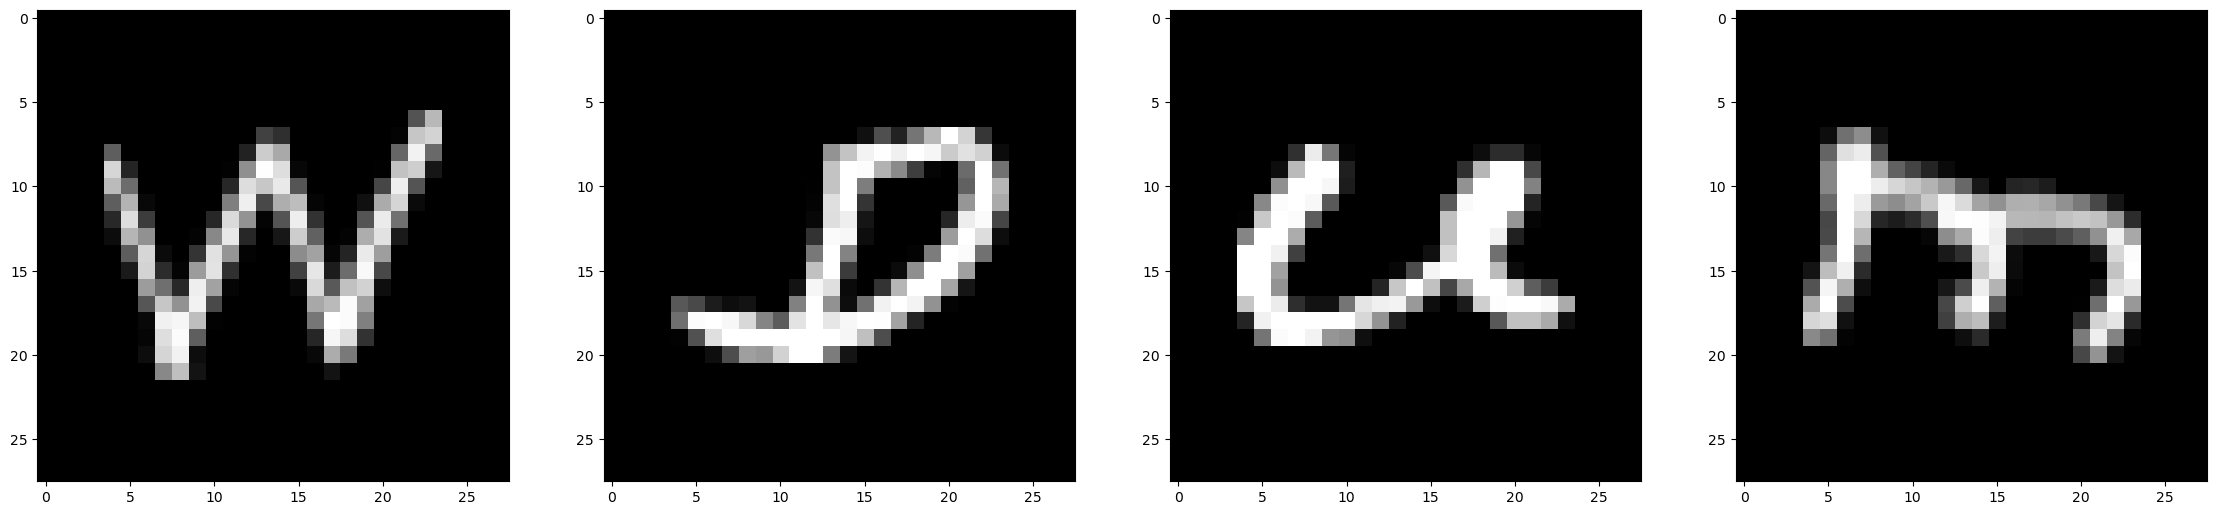

['w', 'd', 'u', 'm']


In [78]:
def look_for_characters(characters, alphabet, labels):
    indices = []
    for char in characters:
        char_index = alphabet[alphabet[0] == char.lower()].index[0] - 1
        char_indices = np.where(labels == char_index)[0]
        indices.append(char_indices[0])  # Bierzemy pierwszy znaleziony indeks dla każdej litery
    return indices

# Przykładowe wywołanie
to_read = ['w', 'd', 'u', 'm']
read_chars = look_for_characters(to_read, english_alphabet, y_test)
pred_read = predict_letters(X_test[read_chars], width=28, height=28, alphabet=english_alphabet, model=mlp_classifier)
print(pred_read)

